In [152]:
# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [27]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
# 데이터 불러오기


# 불러올 파일명
file1 = 'Marketing Funnel by Olist/olist_marketing_qualified_leads_dataset.csv'
file2 = 'Marketing Funnel by Olist/olist_closed_deals_dataset.csv'


# 데이터 불러오기
marketing_qualified_leads = pd.read_csv(file1)
closed_deals = pd.read_csv(file2)

In [4]:
# first_contact_date 컬럼의 데이터 타입을 datetime으로 변경한다
marketing_qualified_leads['first_contact_date'] = pd.to_datetime(marketing_qualified_leads['first_contact_date'])

In [5]:
# 날짜관련 새 컬럼 생성
marketing_qualified_leads['year'] = marketing_qualified_leads['first_contact_date'].dt.year  # 연도
marketing_qualified_leads['month'] = marketing_qualified_leads['first_contact_date'].dt.month # 월
marketing_qualified_leads['day'] = marketing_qualified_leads['first_contact_date'].dt.day # 일
marketing_qualified_leads['year-month'] = marketing_qualified_leads['first_contact_date'].dt.strftime('%Y-%m') # 연도-월

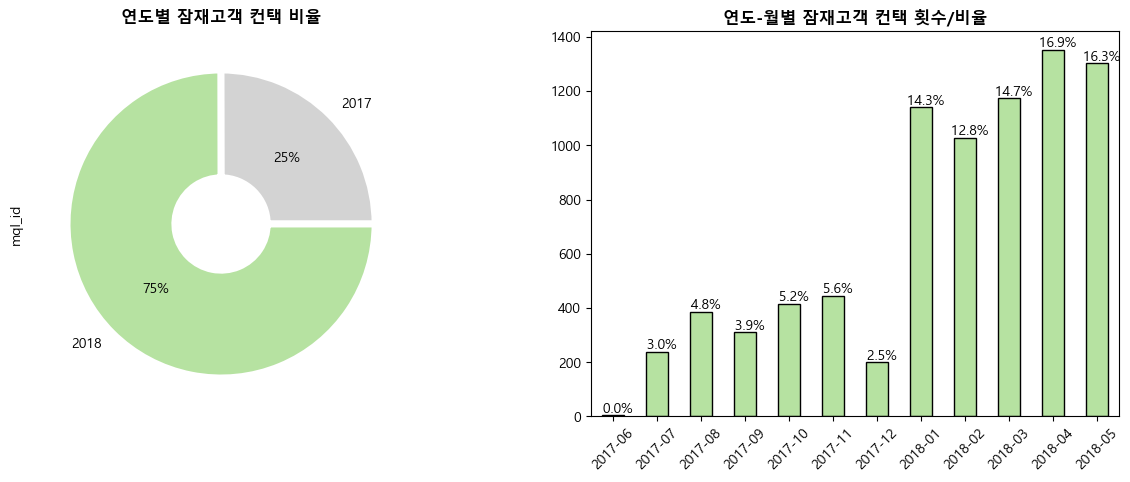

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

a = marketing_qualified_leads.groupby(marketing_qualified_leads['year'])['mql_id'].count().plot.pie(ax=axes[0], autopct = '%.f%%', colors = ['lightgray','#B6E2A1'],wedgeprops=wedgeprops)
axes[0].set_xlabel('')
axes[0].set_title('연도별 잠재고객 컨택 비율',fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

d = marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['mql_id'].count().plot(kind='bar',ax=axes[1],edgecolor='black', color='#B6E2A1')
axes[1].set_xlabel('')
axes[1].set_title('연도-월별 잠재고객 컨택 횟수/비율',fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45);

vlu = round(marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['mql_id'].count()/marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['mql_id'].count().sum()*100,1).values
for p,patch in zip(vlu,d.patches):
    axes[1].text(x=patch.get_x()+0.3 ,y=patch.get_height() + 10 ,s=f'{p : 1.1f}%', ha='center');

In [6]:
print(marketing_qualified_leads.groupby(marketing_qualified_leads['year'])['mql_id'].count()/marketing_qualified_leads.groupby(marketing_qualified_leads['year'])['mql_id'].count().sum()*100)
# 잠재고객을 컨택한 날짜는 2018년이 74% 로 가장 많고, 2017년은 25%이다.

print(marketing_qualified_leads.groupby(marketing_qualified_leads['month'])['mql_id'].count()/marketing_qualified_leads.groupby(marketing_qualified_leads['month'])['mql_id'].count().sum()*100)
# 상대적으로 1~5월에 컨택을 많이 함(12~16%)


year
2017    25.025
2018    74.975
Name: mql_id, dtype: float64
month
1     14.2625
2     12.8500
3     14.6750
4     16.9000
5     16.2875
6      0.0500
7      2.9875
8      4.8250
9      3.9000
10     5.2000
11     5.5625
12     2.5000
Name: mql_id, dtype: float64


origin
organic_search       28.916877
paid_search          19.974811
social               17.002519
unknown              13.841310
direct_traffic        6.284635
email                 6.209068
referral              3.576826
other                 1.889169
display               1.486146
other_publicities     0.818640
Name: proportion, dtype: float64


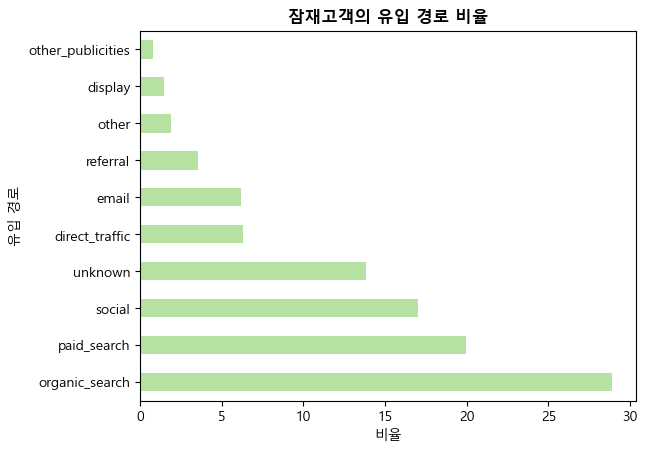

In [78]:
# origin
(marketing_qualified_leads.origin.value_counts(normalize=True)*100).plot(kind='barh',color='#B6E2A1')
plt.title('잠재고객의 유입 경로 비율',fontweight='bold')
plt.xlabel('비율')
plt.ylabel('유입 경로')
print(marketing_qualified_leads.origin.value_counts(normalize=True)*100)

# organic_search인것으로 보아 잠재 판매자가 직접 유입한것으로 보임.
# organic : 키워드 광고(유료)를 통해 사용자가 앱을 설치하거나 웹에 접속한다면 이것은 오가닉
# referral : 기존 이용자가 신규 이용자에게 추천

In [92]:
# 월별로 보았을때 organic_search가 항상 높았을까?
round(marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['origin'].value_counts()/marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['origin'].value_counts().groupby('year-month').sum()*100,2).tail(70)

year-month  origin           
2017-11     organic_search       27.25
            social               21.40
            paid_search          15.77
            unknown              14.19
            email                 8.33
            direct_traffic        5.86
            referral              4.50
            display               1.35
            other_publicities     0.68
            other                 0.68
2017-12     organic_search       30.46
            social               19.80
            paid_search          17.77
            unknown              12.69
            email                 6.09
            direct_traffic        5.08
            referral              4.57
            display               2.54
            other                 0.51
            other_publicities     0.51
2018-01     organic_search       36.27
            paid_search          14.96
            social               14.26
            unknown              13.29
            direct_traffic        

Text(0, 0.5, '횟수')

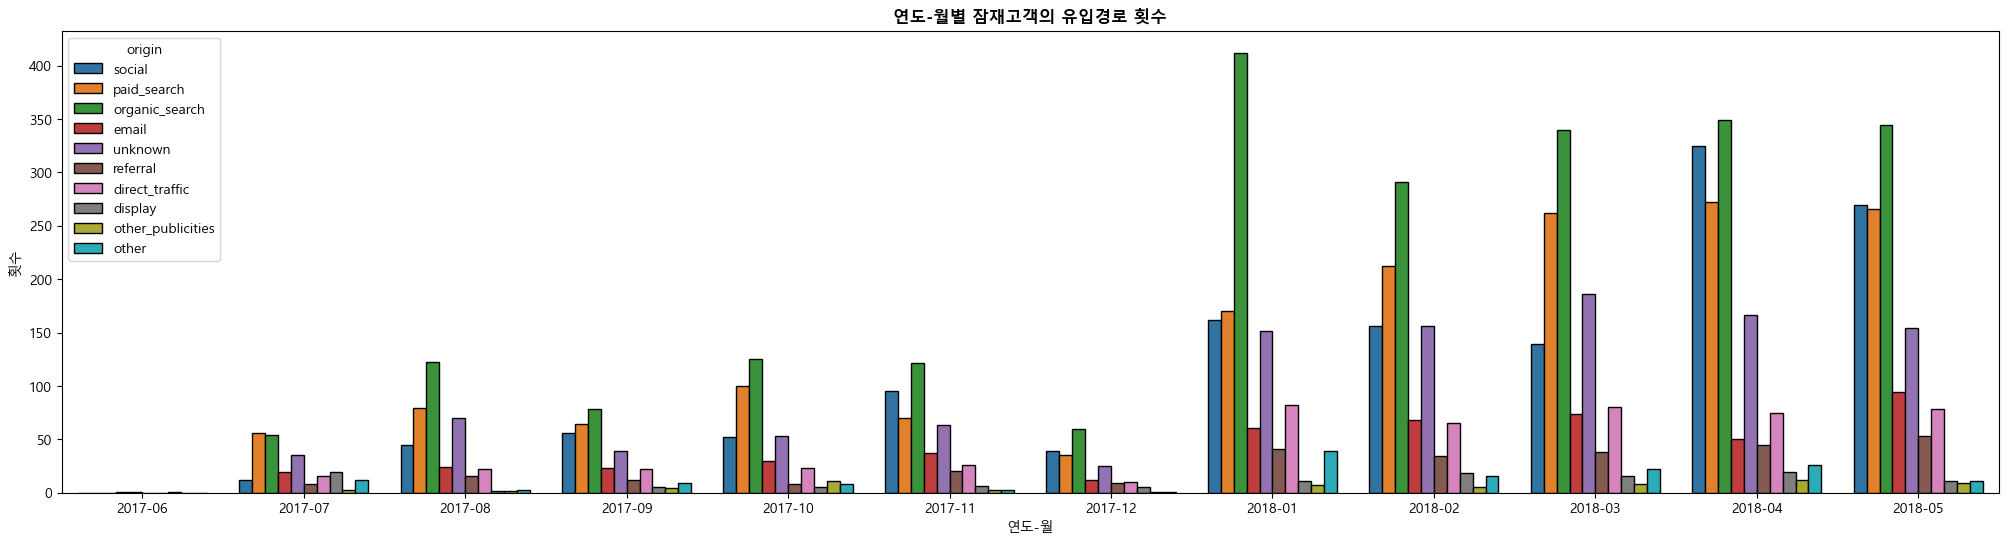

In [94]:
plt.subplots(figsize=(25, 6))
sns.countplot(data=marketing_qualified_leads, x='year-month',hue='origin', order=marketing_qualified_leads['year-month'].value_counts().sort_index().index,edgecolor='black')
plt.title('연도-월별 잠재고객의 유입경로 횟수',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('횟수')
# 컨택하는 날짜별 잠재고객의 유입경로

In [46]:
marketing_qualified_leads['landing_page_id'].value_counts(normalize=True)

landing_page_id
b76ef37428e6799c421989521c0e5077    0.114000
22c29808c4f815213303f8933030604c    0.110375
58326e62183c14b0c03085c33b9fdc44    0.061875
88740e65d5d6b056e0cda098e1ea6313    0.055625
ce1a65abd0973638f1c887a6efcfa82d    0.049250
                                      ...   
8999524db83541c7f1ad48906d5d4b86    0.000125
be7f31219be243061a39a4a158898688    0.000125
ea4434c9a6df0098e720204ba3dbb76d    0.000125
e5eaa929c6697d69cd76727daa809042    0.000125
3683ba5726e741af4b8b02bcaef4e7b3    0.000125
Name: proportion, Length: 495, dtype: float64

In [93]:
marketing_qualified_leads['landing_page_id'].nunique()
# 잠재고객이 처음 접속한 페이지는 모두 ID로 되어 있어서 식별 불가

495

In [28]:
marketing_qualified_leads.groupby(marketing_qualified_leads['origin'])['landing_page_id'].value_counts()

origin          landing_page_id                 
direct_traffic  22c29808c4f815213303f8933030604c    105
                ce1a65abd0973638f1c887a6efcfa82d     46
                b76ef37428e6799c421989521c0e5077     25
                e492ee5eaf1697716985cc6f33f9cd9b     22
                7fa6214d82e911d070f51ef79381b956     22
                                                   ... 
unknown         375e354da26e8619e407002dde41f19c      1
                3b9715bd3b57ba1727acec71ed308568      1
                3c46fdd071e979b10c7a2ccc395e72f0      1
                3c5cc1a2e1d86abfce2a16a1bcc80e26      1
                fe82aeadeaea2186478fe6353d6d5301      1
Name: count, Length: 1159, dtype: int64

In [55]:

marketing_qualified_leads.groupby(marketing_qualified_leads['year-month'])['origin'].value_counts()
# 일단 2018년 3~6월만 봣을떈 organic_search가 가장 많이 차지함.

year-month  origin           
2017-06     email                 1
            unknown               1
            display               1
2017-07     paid_search          56
            organic_search       54
                                 ..
2018-05     direct_traffic       78
            referral             53
            display              11
            other                11
            other_publicities     9
Name: count, Length: 113, dtype: int64

### closed_deals 분석

In [95]:
closed_deals.head()

mql_id                         seller_id   
0  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06  \
1  a555fb36b9368110ede0f043dfc3b9a0  bbb7d7893a450660432ea6652310ebb7   
2  327174d3648a2d047e8940d7d15204ca  612170e34b97004b3ba37eae81836b4c   
3  f5fee8f7da74f4887f5bcae2bafb6dd6  21e1781e36faf92725dde4730a88ca0f   
4  ffe640179b554e295c167a2f6be528e0  ed8cb7b190ceb6067227478e48cf8dde   

                             sdr_id                             sr_id   
0  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe  \
1  09285259593c61296eef10c734121d5b  d3d1e91a157ea7f90548eef82f1955e3   
2  b90f87164b5f8c2cfa5c8572834dbe3f  6565aa9ce3178a5caf6171827af3a9ba   
3  56bf83c4bb35763a51c2baab501b4c67  d3d1e91a157ea7f90548eef82f1955e3   
4  4b339f9567d060bcea4f5136b9f5949e  d3d1e91a157ea7f90548eef82f1955e3   

              won_date business_segment      lead_type lead_behaviour_profile   
0  2018-02-26 19:58:54              pet  online_medium                    cat  \
1  2018-05-08 20:17:59  car_accessories       industry                  eagle   
2  2018-06-05 17:27:23  home_appliances     online_big                    cat   
3  2018-01-17 13:51:03       food_drink   online_small                    NaN   
4  2018-07-03 20:17:45  home_appliances       industry                   wolf   

  has_company has_gtin average_stock business_type   
0         NaN      NaN           NaN      reseller  \
1         NaN      NaN           NaN      reseller   
2         NaN      NaN           NaN      reseller   
3         NaN      NaN           NaN      reseller   
4         NaN      NaN           NaN  manufacturer   

   declared_product_catalog_size  declared_monthly_revenue  
0                            NaN                       0.0  
1                            NaN                       0.0  
2                            NaN                       0.0  
3                            NaN                       0.0  
4                            NaN                       0.0

In [96]:
closed_deals['won_date']

0      2018-02-26 19:58:54
1      2018-05-08 20:17:59
2      2018-06-05 17:27:23
3      2018-01-17 13:51:03
4      2018-07-03 20:17:45
5      2018-02-07 18:04:05
6      2018-04-16 18:18:22
7      2018-04-17 17:01:57
8      2018-05-14 18:37:15
9      2018-04-24 03:00:00
10     2018-02-28 19:42:14
11     2018-02-23 13:54:40
12     2018-05-22 13:24:08
13     2018-06-14 14:30:20
14     2018-04-10 03:00:00
15     2018-09-10 14:18:01
16     2018-04-10 19:21:54
17     2018-01-26 17:23:46
18     2018-05-11 19:03:19
19     2018-06-19 14:08:22
20     2018-02-07 13:57:02
21     2018-04-16 13:09:09
22     2018-02-08 17:20:14
23     2018-02-16 12:31:56
24     2018-02-22 12:40:15
25     2018-02-12 13:18:13
26     2018-02-08 20:57:44
27     2018-04-06 20:52:54
28     2018-04-13 12:27:48
29     2018-04-18 18:02:08
30     2018-07-19 18:06:07
31     2018-07-04 15:07:27
32     2018-04-25 03:00:00
33     2018-06-05 17:20:34
34     2018-10-31 16:54:59
35     2018-05-30 14:43:50
36     2018-03-06 12:25:29
3

In [97]:
closed_deals['new_won_date'] = pd.to_datetime(closed_deals['won_date']).dt.date
closed_deals['won_year'] =  pd.to_datetime(closed_deals['won_date']).dt.year
closed_deals['won_year_month'] =  pd.to_datetime(closed_deals['won_date']).dt.strftime('%Y-%m')

In [98]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [99]:
marketing_qualified_leads[~marketing_qualified_leads['mql_id'].isin(closed_deals['mql_id'])].sort_values('landing_page_id')

mql_id first_contact_date   
4775  565b7e1332c5d26362dd2487ea625746         2017-09-25  \
6799  3ffd71f587fdbbec02e6d4a51c962b10         2018-01-03   
1668  c721af033e9cb9e718f1ce3ca2c4e09c         2017-10-23   
2418  4a9afaeb2472f426769ee7fe737f82ff         2017-08-20   
4349  dcae12740b8e5aada9483b428027d6e4         2018-03-01   
7474  f45451d5c725bd5795d432e970d3d978         2018-03-21   
3986  88d619ad97413b44d6659073b7b12f32         2017-08-25   
6752  733e42652ad8998910d59488625dd70b         2018-03-04   
5473  8d6b31ed2ba3ecd5a1c7a80773f01ec2         2017-08-23   
2689  fc6abf7b29980aa85f2fb4b97682190f         2017-09-20   
817   356333e7a96d35ff0f200107a9317e15         2018-03-29   
3413  dc2975799aeb838479c3cea296015bce         2017-11-01   
7819  fc6c40a57bca562c8067d1062eb91e6c         2018-05-25   
3379  2f67c31ef2232270b2cbcc57d98b23e2         2017-09-16   
7565  0a27d42aa8dba19f9cf326cf6620b29a         2018-04-24   
1568  78fae49d26eda3e6a828cb07e659acad         2017-10-06   
418   82034d7a5bdc3b8a2d2d08e9c9ab5c8c         2017-10-06   
6951  0a38436397f65f4dba1b4393d81e9159         2017-09-25   
5235  54ed85e7af8edc78637654cb4a89040e         2017-09-09   
90    e7a7ba56b1be30e178cd52820e063396         2017-09-15   
89    fc90ef8f569ff0eecfdc2c3860ee64a1         2018-03-24   
4784  3f00436e3415eabeafb77ba1fe5b6f87         2018-01-16   
5802  a205ed56ca1196d71b8793e0415e87ed         2018-04-02   
3888  f87a6139b96bb4b85b23618ae6988252         2018-03-28   
4594  f23a13a09954dada8fad3e0691dfcf0f         2017-08-21   
2128  57990ea703eff0f2408e8bac75f342d3         2017-10-07   
4215  9640700c442214957adbe5aa77e2ace3         2017-10-01   
4260  8042532a1caf8cab4c93569cb42469ba         2017-09-30   
3573  f1b967e673681c3b9cdbc9c568949344         2017-08-23   
5645  c7602768a214451d3d91346fed37176b         2017-08-27   
7463  39ba31c76f5b8342fdcca5189a9253dc         2017-12-05   
4628  00c37b7a1f13daf967813da9b68937f3         2017-10-06   
1020  3f6de4da8480ac363897d3ea0d5144e5         2018-03-24   
5982  5143b1a03753e9634ad9395eb18e0417         2017-09-27   
6443  122fb7b4ed45d1a1489232864c606b4d         2017-08-09   
2111  2c5d7eba7610493f33dd6b68d75ef87c         2018-05-28   
7172  302c6ebc7de25ab0851c6c86bdad6106         2018-03-28   
3487  22852db60a3406b42630a69fbc08e4a2         2017-10-06   
6338  2ec8adb60182b3c41a31333baecd332a         2017-10-22   
2157  52a6b7e16cac1d84b4e832c1aa0005e3         2017-09-20   
790   a0e862b5c2de0352aeb851d943e6046c         2017-10-06   
7053  5107915b16ea89bdc0dd279cc6686680         2018-03-15   
6604  db68c24a33cac9d591bcf63e60c4cc8f         2017-10-24   
4723  5bb359283f79a2e477eefe535fedc9dc         2017-10-04   
6912  9022449a6088c336116c9b5fe457c700         2017-08-08   
5118  eade5febf80213b6310d1b17bafc98ff         2017-07-24   
4893  3c3961f8fc1f905eb7d2a9d96cd84298         2017-10-18   
7517  be4dfce0bd450fdd57fda1bd637ad712         2017-09-28   
3454  ebf283eef673870e3325594ffcc9049e         2018-03-05   
531   4703fca5bd695de77eb2fe6728cfceba         2017-11-06   
3498  ed21b54c417d6d8638aef8efc652fe37         2017-09-04   
7207  2210bc8c8682f678d552ff7add41b418         2017-07-10   
5101  30841bea013ba7357328165089fd6b47         2017-10-26   
1879  f43f639000f6f3c6ff1f3e8006ac0816         2017-07-05   
6677  66fc580be47fe3ede1959fca149140a8         2018-03-28   
5208  bf7e527b0c579691ec93e1a1066fa18f         2017-10-31   
1248  d65598b7a583ff113467d5b6f693a031         2017-09-17   
6845  36b14516d8f92201b3ff6326fec41872         2018-04-05   
1     8c18d1de7f67e60dbd64e3c07d7e9d5d         2017-10-20   
248   fa4dbc17e5005a96e83003e98cea1340         2017-10-03   
4671  0e5e839681f3afe608d1555c1c698efe         2017-10-06   
4453  6a5786dfbaaebbc3e92329baab4b4c08         2017-11-23   
114   2538ccba4cdbde6974a7a6a61c7d8f24         2018-04-02   
4875  2d968cb99817ea5e49f4bcb70f7f154a         2018-01-14   
3670  a7ad710353b08b3d1e7ee6daca9679cc         2018-02-07   
1576  

Text(0.5, 1.0, '계약이 체결된 잠재고객의 사업 분야')

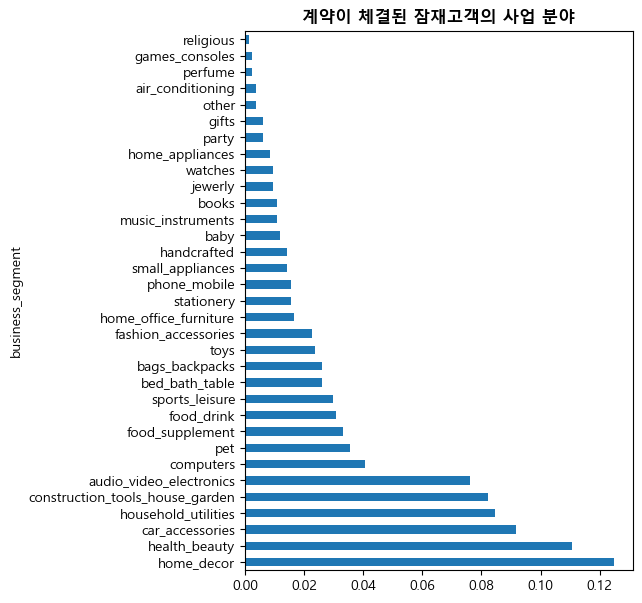

In [114]:
plt.subplots(figsize=(5,7))
closed_deals['business_segment'].value_counts(normalize=True).plot(kind='barh')
plt.title('계약이 체결된 잠재고객의 사업 분야',fontweight='bold')

Text(0.5, 1.0, '계약이 체결된 잠재고객의 회사규모')

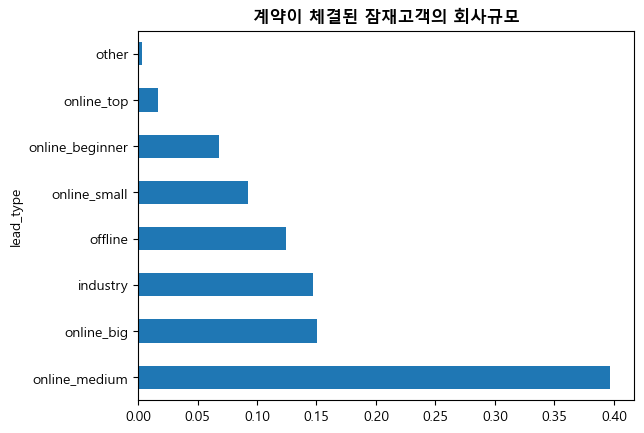

In [113]:
closed_deals['lead_type'].value_counts(normalize=True).plot(kind='barh')
plt.title('계약이 체결된 잠재고객의 회사규모',fontweight='bold')

In [58]:
closed_deals['lead_behaviour_profile'].value_counts(normalize=True)

lead_behaviour_profile
cat            0.612030
eagle          0.184962
wolf           0.142857
shark          0.036090
cat, wolf      0.012030
eagle, wolf    0.004511
eagle, cat     0.004511
shark, cat     0.001504
shark, wolf    0.001504
Name: proportion, dtype: float64

Text(0.5, 1.0, '계약이 체결된 잠재고객의 성향')

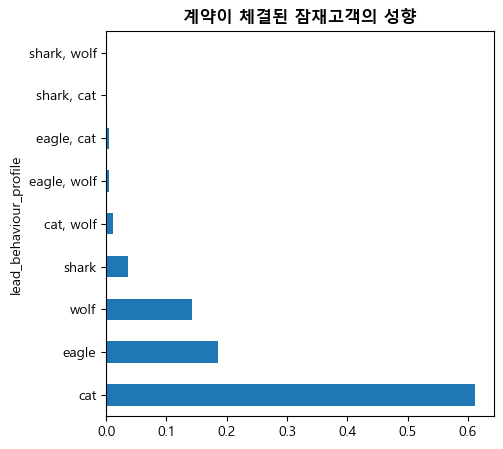

In [139]:
plt.subplots(figsize=(5, 5))
closed_deals['lead_behaviour_profile'].value_counts(normalize=True).plot(kind='barh')
plt.title('계약이 체결된 잠재고객의 성향',fontweight='bold')

### closed_deals + marketing_qualified_leads 분석

merge : mql_id
SR : 영업 담당자
SDR : 영업 개발 담당자
|컬럼|설명|
|-|-|
|mql_id|	기업에서 선별한 잠재 고객 식별 ID|
|seller_id|	판매자ID|
|sdr_id	|영업 개발 담당자ID : 잠재 고객 찾고, 첫번째 접촉점을 만드는 담당자|
|sr_id	|영업 담당자 ID : 잠재 고객을 실제 고객으로 전환하기 위해 그들과 직접적으로 상호 작용하고, 제품 또는 서비스에 대해 더 상세히 설명하고, 계약을 체결하는 역할|
|won_date|	SR과 잠재 고객의 계약 체결 일자, 시각|
|business_segment	|판매자의 비즈니스 세그먼트(ex,리셀러 제조업체 등)|
|lead_type	|리드 타입 (ex 온라인, 오프라인 등)|
|lead_behaviour_profile|	잠재 고객의 행동 프로필 (현재 우리는 아래 단어의 의미를 추측만 가능한 상태)|
|has_company|	판매자의 회사 보유 여부|
|has_gtin|	판매자의 제품에 대한 GTIN(Global Trade Item Number) 보유 여부 * GITN :국제적으로 인정되는 제품의 고유 식별자|
|average_stock|	판매자의 평균 재고량|
|business_type	|판매자의 비즈니스 유형(ex 제조업체, 도매업체, 소매업체 등 )|
|declared_product_catalog_size	|판매자가 등록한 제품 카탈로그 크기|
|declared_monthly_revenue|판매자가 보고한 월 간 매출|


In [165]:
# 두 DataFrame을 mql_id 컬럼을 기준으로 merge한다 ⭐
df = marketing_qualified_leads.merge(closed_deals, on='mql_id', how='left')

In [165]:
NoMQL_table = df[df['seller_id'].isnull()]
NoMQL_table = NoMQL_table[['mql_id','first_contact_date','landing_page_id','origin']]
NoMQL_table['first_contact_date'] = pd.to_datetime(NoMQL_table['first_contact_date'])
NoMQL_table['origin'] = NoMQL_table['origin'].fillna('unknown')
NoMQL_table = NoMQL_table.sort_values('mql_id')
NoMQL_table

mql_id first_contact_date   
6447  0002ac0d783338cfeab0b2bdbd872cda         2017-11-14  \
6307  001d3439223b7bb23ed89b9c8890d096         2018-04-14   
1551  00275937100699204a3d5ae3caf7190d         2018-01-11   
2202  003d859bbd84a526b9e06340ce7d185f         2018-04-02   
5846  00532c4adc6d5dadb6d58e9de817b59a         2018-05-02   
...                                ...                ...   
127   ffc87aa6d02f68087d1978176980b783         2018-01-14   
2516  ffd5a146054a13ce7bd23f9ed8612e7c         2017-09-10   
4583  ffec39090fa0c85692730fdbd647e34d         2018-04-17   
7398  ffec991bf0f35f7e7688cf0d39c9f9f4         2017-11-23   
2083  fffffe98d0963d27015c198262d97221         2018-01-25   

                       landing_page_id          origin  
6447  b76ef37428e6799c421989521c0e5077         unknown  
6307  35c9b150ab36fe584c1f24fd458c453a     paid_search  
1551  a7982125ff7aa3b2054c6e44f9d28522  organic_search  
2202  22c29808c4f815213303f8933030604c  direct_traffic  
5846  37cf94070e940a694969304de58debe1         unknown  
...                                ...             ...  
127   22c29808c4f815213303f8933030604c        referral  
2516  22c29808c4f815213303f8933030604c  organic_search  
4583  515742ea988a44a8ca0ddc44ff92735f           email  
7398  b76ef37428e6799c421989521c0e5077         unknown  
2083  88740e65d5d6b056e0cda098e1ea6313          social  

[7158 rows x 4 columns]

In [166]:
#⭐
mapping = {}

# 주어진 문자열을 순회하면서 번호 매김
for item in NoMQL_table['mql_id']:
    if item in mapping:  # 이미 매핑된 문자인 경우
        pass
    else:  # 처음 나타나는 문자인 경우 새 번호를 부여
        new_number = len(mapping) + 1
        mapping[item] = new_number
    

NoMQL_table['mql_id'] = NoMQL_table['mql_id'].apply(lambda x : mapping[x])

In [167]:
#⭐
mapping = {}

# 주어진 문자열을 순회하면서 번호 매김
for item in NoMQL_table['landing_page_id']:
    if item in mapping:  # 이미 매핑된 문자인 경우
        pass
    else:  # 처음 나타나는 문자인 경우 새 번호를 부여
        new_number = len(mapping) + 1
        mapping[item] = new_number
    

NoMQL_table['landing_page_id'] = NoMQL_table['landing_page_id'].apply(lambda x : mapping[x])

In [173]:
NoMQL_table['origin'].nunique()

10

In [170]:
NoMQL_table.to_csv('NoMQL_table',index=False)

In [92]:
# 계약까지 걸리는 기간 파악위해 새컬럼 생성
df['new_won_time'] = pd.to_datetime(df['won_date']).dt.time
df['contact_won_date'] = pd.to_datetime(df['won_date']) - pd.to_datetime(df['first_contact_date'])

In [94]:
df.to_csv('merged_df',index=False)  # 머지하고 파일저장.

In [116]:
df.head()

mql_id first_contact_date   
0  dac32acd4db4c29c230538b72f8dd87d         2018-02-01  \
1  8c18d1de7f67e60dbd64e3c07d7e9d5d         2017-10-20   
2  b4bc852d233dfefc5131f593b538befa         2018-03-22   
3  6be030b81c75970747525b843c1ef4f8         2018-01-22   
4  5420aad7fec3549a85876ba1c529bd84         2018-02-21   

                    landing_page_id          origin  year  month  day   
0  88740e65d5d6b056e0cda098e1ea6313          social  2018      2    1  \
1  007f9098284a86ee80ddeb25d53e0af8     paid_search  2017     10   20   
2  a7982125ff7aa3b2054c6e44f9d28522  organic_search  2018      3   22   
3  d45d558f0daeecf3cccdffe3c59684aa           email  2018      1   22   
4  b48ec5f3b04e9068441002a19df93c6c  organic_search  2018      2   21   

  year-month                         seller_id   
0    2018-02                               NaN  \
1    2017-10                               NaN   
2    2018-03                               NaN   
3    2018-01                               NaN   
4    2018-02  2c43fb513632d29b3b58df74816f1b06   

                             sdr_id  ... lead_behaviour_profile has_company   
0                               NaN  ...                    NaN         NaN  \
1                               NaN  ...                    NaN         NaN   
2                               NaN  ...                    NaN         NaN   
3                               NaN  ...                    NaN         NaN   
4  a8387c01a09e99ce014107505b92388c  ...                    cat         NaN   

  has_gtin average_stock business_type declared_product_catalog_size   
0      NaN           NaN           NaN                           NaN  \
1      NaN           NaN           NaN                           NaN   
2      NaN           NaN           NaN                           NaN   
3      NaN           NaN           NaN                           NaN   
4      NaN           NaN      reseller                           NaN   

  declared_monthly_revenue new_won_date won_year  won_year_month  
0                      NaN          NaN      NaN             NaN  
1                      NaN          NaN      NaN             NaN  
2                      NaN          NaN      NaN             NaN  
3                      NaN          NaN      NaN             NaN  
4                      0.0   2018-02-26   2018.0         2018-02  

[5 rows x 24 columns]

In [117]:
df.seller_id.nunique()/df.mql_id.nunique()*100
# 잠재고객이 계약할 확률은 전체 10%

10.525

In [118]:
round(df.groupby(df['year-month'])['seller_id'].count()/df.groupby(df['year-month'])['mql_id'].count()*100,2)

year-month
2017-06     0.00
2017-07     0.84
2017-08     2.33
2017-09     2.24
2017-10     3.37
2017-11     4.04
2017-12     5.50
2018-01    13.32
2018-02    14.49
2018-03    14.22
2018-04    13.54
2018-05     9.98
dtype: float64

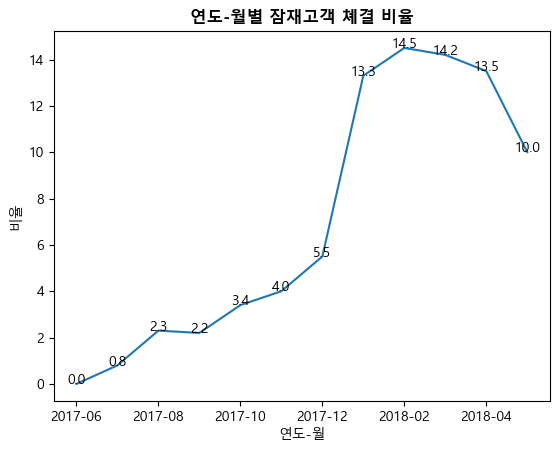

In [136]:
a=round(df.groupby(df['year-month'])['seller_id'].count()/df.groupby(df['year-month'])['mql_id'].count()*100,1)
a.plot()
plt.title('연도-월별 잠재고객 쳬결 비율',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('비율')
#잠재고객이 계약하는 전체 퍼센트는 10%뿐. 이것을 연도-월별로 확인해보면 계속해서 증가하는 추세이다가 2018년 2월부터 잠재고객컨택한것에 비해 계약하는 활률이 감소한다.
for i, v in enumerate(a):
    plt.text(i, v, f'{v}', ha='center')

In [10]:
df.groupby(df['seller_id'])['declared_monthly_revenue'].count().unique()
# 판매자가 보고한 월 간 매출은 모두 seller_id당 하나만 존재.

array([1], dtype=int64)

In [140]:
df.isnull().sum()

mql_id                              0
first_contact_date                  0
landing_page_id                     0
origin                             60
year                                0
month                               0
day                                 0
year-month                          0
seller_id                        7158
sdr_id                           7158
sr_id                            7158
won_date                         7158
business_segment                 7159
lead_type                        7164
lead_behaviour_profile           7335
has_company                      7937
has_gtin                         7936
average_stock                    7934
business_type                    7168
declared_product_catalog_size    7931
declared_monthly_revenue         7158
new_won_date                     7158
won_year                         7158
won_year_month                   7158
dtype: int64

In [153]:
df[df.seller_id.isnull()]['declared_monthly_revenue'].sum()

0.0

Text(0, 0.5, '매출')

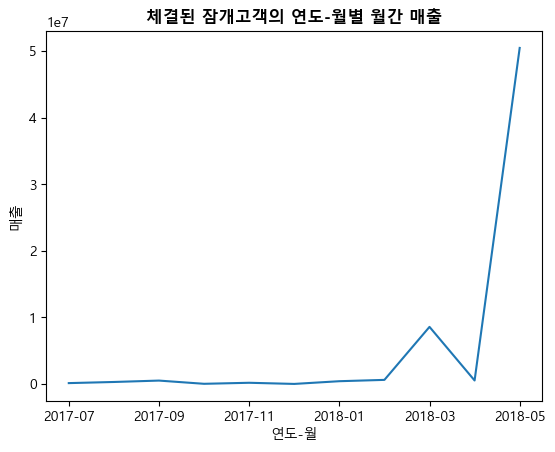

In [155]:
df[~df.seller_id.isnull()].groupby('year-month')['declared_monthly_revenue'].sum().plot()
plt.title('체결된 잠개고객의 연도-월별 월간 매출',fontweight='bold')
plt.xlabel('연도-월')
plt.ylabel('매출')

In [11]:
df.groupby(df['year-month'])['declared_monthly_revenue'].describe()

count           mean           std  min      25%      50%   
year-month                                                              
2017-06       0.0            NaN           NaN  NaN      NaN      NaN  \
2017-07       2.0   65000.000000  9.192388e+04  0.0  32500.0  65000.0   
2017-08       9.0   33333.333333  1.000000e+05  0.0      0.0      0.0   
2017-09       7.0   72857.142857  1.071936e+05  0.0      0.0  50000.0   
2017-10      14.0    1857.571429  6.666172e+03  0.0      0.0      0.0   
2017-11      18.0   10000.000000  3.564531e+04  0.0      0.0      0.0   
2017-12      11.0     727.272727  2.412091e+03  0.0      0.0      0.0   
2018-01     152.0    2736.842105  2.263992e+04  0.0      0.0      0.0   
2018-02     149.0    4127.516779  2.578321e+04  0.0      0.0      0.0   
2018-03     167.0   51377.245509  6.191942e+05  0.0      0.0      0.0   
2018-04     183.0    2868.852459  3.697481e+04  0.0      0.0      0.0   
2018-05     130.0  388415.384615  4.385004e+06  0.0      0.0      0.0   

                75%         max  
year-month                       
2017-06         NaN         NaN  
2017-07     97500.0    130000.0  
2017-08         0.0    300000.0  
2017-09     80000.0    300000.0  
2017-10         0.0     25000.0  
2017-11         0.0    150000.0  
2017-12         0.0      8000.0  
2018-01         0.0    250000.0  
2018-02         0.0    210000.0  
2018-03         0.0   8000000.0  
2018-04         0.0    500000.0  
2018-05         0.0  50000000.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   year                           8000 non-null   int64  
 5   month                          8000 non-null   int64  
 6   day                            8000 non-null   int64  
 7   year-month                     8000 non-null   object 
 8   seller_id                      842 non-null    object 
 9   sdr_id                         842 non-null    object 
 10  sr_id                          842 non-null    object 
 11  won_date                       842 non-null    object 
 12  business_segment               841 non-null    o

In [158]:
sellers = pd.read_csv('Brazilian E-Commerce Public Dataset by Olist/olist_sellers_dataset.csv')
sellers.head()

seller_id  seller_zip_code_prefix   
0  3442f8959a84dea7ee197c632cb2df15                   13023  \
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [168]:
sellers['seller_id'].nunique()

3095

In [169]:
# 두 DataFrame을 mql_id 컬럼을 기준으로 merge한다 ⭐
df = marketing_qualified_leads.merge(closed_deals, on='mql_id', how='right')
df.shape

(842, 17)

In [170]:
df.merge(sellers, on='seller_id',how='outer')

mql_id first_contact_date   
0     5420aad7fec3549a85876ba1c529bd84         2018-02-21  \
1     a555fb36b9368110ede0f043dfc3b9a0         2018-04-04   
2     327174d3648a2d047e8940d7d15204ca         2018-04-03   
3     f5fee8f7da74f4887f5bcae2bafb6dd6         2018-01-14   
4     ffe640179b554e295c167a2f6be528e0         2017-10-09   
...                                ...                ...   
3552                               NaN                NaN   
3553                               NaN                NaN   
3554                               NaN                NaN   
3555                               NaN                NaN   
3556                               NaN                NaN   

                       landing_page_id          origin   
0     b48ec5f3b04e9068441002a19df93c6c  organic_search  \
1     2f08471dfb83baef522f952438a36f6e        referral   
2     1ceb590cd1e00c7ee95220971f82693d  organic_search   
3     22c29808c4f815213303f8933030604c     paid_search   
4     a0fbc0263cb98bdb0d72b9f9f283a172         unknown   
...                                ...             ...   
3552                               NaN             NaN   
3553                               NaN             NaN   
3554                               NaN             NaN   
3555                               NaN             NaN   
3556                               NaN             NaN   

                             seller_id                            sdr_id   
0     2c43fb513632d29b3b58df74816f1b06  a8387c01a09e99ce014107505b92388c  \
1     bbb7d7893a450660432ea6652310ebb7  09285259593c61296eef10c734121d5b   
2     612170e34b97004b3ba37eae81836b4c  b90f87164b5f8c2cfa5c8572834dbe3f   
3     21e1781e36faf92725dde4730a88ca0f  56bf83c4bb35763a51c2baab501b4c67   
4     ed8cb7b190ceb6067227478e48cf8dde  4b339f9567d060bcea4f5136b9f5949e   
...                                ...                               ...   
3552  98dddbc4601dd4443ca174359b237166                               NaN   
3553  f8201cab383e484733266d1906e2fdfa                               NaN   
3554  74871d19219c7d518d0090283e03c137                               NaN   
3555  e603cf3fec55f8697c9059638d6c8eb5                               NaN   
3556  9e25199f6ef7e7c347120ff175652c3b                               NaN   

                                 sr_id             won_date business_segment   
0     4ef15afb4b2723d8f3d81e51ec7afefe  2018-02-26 19:58:54              pet  \
1     d3d1e91a157ea7f90548eef82f1955e3  2018-05-08 20:17:59  car_accessories   
2     6565aa9ce3178a5caf6171827af3a9ba  2018-06-05 17:27:23  home_appliances   
3     d3d1e91a157ea7f90548eef82f1955e3  2018-01-17 13:51:03       food_drink   
4     d3d1e91a157ea7f90548eef82f1955e3  2018-07-03 20:17:45  home_appliances   
...                                ...                  ...              ...   
3552                               NaN                  NaN              NaN   
3553                               NaN                  NaN              NaN   
3554                               NaN                  NaN              NaN   
3555                               NaN                  NaN              NaN   
3556                               NaN                  NaN              NaN   

          lead_type lead_behaviour_profile has_company has_gtin average_stock   
0     online_medium                    cat         NaN      NaN           NaN  \
1          industry                  eagle         NaN      NaN           NaN   
2        online_big                    cat         NaN      NaN           NaN   
3      online_small                    NaN         NaN      NaN           NaN   
4          industry                   wolf         NaN      NaN           NaN   
...             ...                    ...         ...      ...           ...   
3552            NaN                    NaN         NaN      NaN           NaN   
3553            NaN                    NaN         NaN      NaN           NaN   

In [66]:
seller_table.drop(columns=['has_company','has_gtin','average_stock','declared_product_catalog_size'], axis=1, inplace=True)

In [57]:
seller_table['first_contact_date'] = pd.to_datetime(seller_table['first_contact_date'])
seller_table['won_date'] = pd.to_datetime(seller_table['won_date'])